In [63]:
pwd

'/Users/aidasaglinskas/Desktop/BC-FacExpr-1.2-fMRI-mainExp'

In [277]:
from matplotlib import pyplot as plt
from PIL import Image, ImageEnhance,ImageStat
import skvideo
import skvideo.io
import numpy as np
import os
from tqdm import tqdm

In [383]:
import alignfaces as afa

In [283]:
def load_video(fn):
    #fn = 'ID4_h1_1.mp4'
    videodata = skvideo.io.vread(fn)
    return videodata

In [ ]:
# EXPORTING
# MUST BE .astype(np.uint8) for export
# Vid is 1280x720

In [265]:
files = [os.path.join('./stimuli/',file) for file in os.listdir('./stimuli/') if file.endswith('.mp4')]
files.sort()
files[0:5]

['./stimuli/ID1_d1_1.mp4',
 './stimuli/ID1_d1_2.mp4',
 './stimuli/ID1_d1_3.mp4',
 './stimuli/ID1_d1_4.mp4',
 './stimuli/ID1_f_1.mp4']

In [289]:
hist_brightness = []
hist_contrast = []
for file in tqdm(files):
    vid = load_video(file)
    hist_brightness.append(  vid[0,:,:,:].mean()  )
    hist_contrast.append(  vid[0,:,:,:].mean(axis=-1).std() )

100%|██████████████████████████████████████████████████████████████████████████████████████████| 145/145 [00:28<00:00,  5.09it/s]


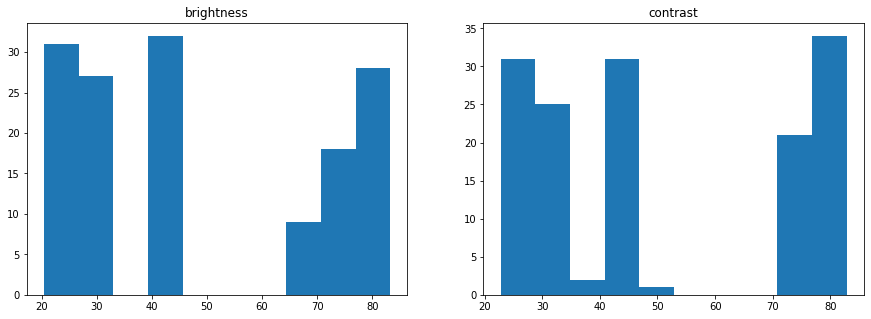

In [290]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.hist(hist_brightness);
plt.title('brightness');
plt.subplot(1,2,2)
plt.hist(hist_contrast);
plt.title('contrast');

In [314]:
brightness_target = np.array(hist_brightness).mean()
brightness_target.round(3)

48.091

In [315]:
contrast_target = np.array(hist_contrast).mean()
contrast_target.round(3)

51.28

In [375]:
files = np.random.permutation(files)

In [380]:
# NORMALIZE TO TARGET VALUES
#for f in range(len(files)):
for f in tqdm(range(len(files))):
    fn = files[f]
    #print(fn)
    videodata = load_video(fn)
    for i in range(10):
        contrast = videodata[0,:,:,:].mean(axis=-1).std()
        brightness = videodata[0,:,:,:].mean()
        #print(f'{contrast:.2f}|{brightness:2f}')
        videodata = contrast_video(videodata,contrast_target/contrast)
        videodata = brighten_video(videodata,brightness_target/brightness)

    save_video(videodata,ofn=fn.replace('./stimuli/','./stimuli_normed/'))

100%|██████████████████████████████████████████████████████████████████████████████████████████| 145/145 [21:04<00:00,  8.72s/it]


100%|██████████████████████████████████████████████████████████████████████████████████████████| 145/145 [00:38<00:00,  3.81it/s]


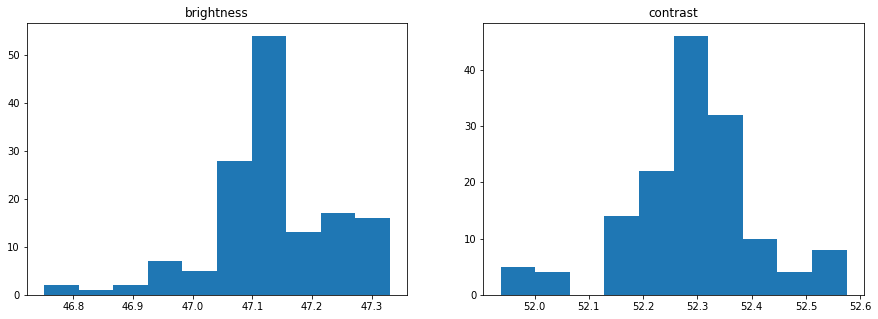

In [381]:
files = [os.path.join('./stimuli_normed/',file) for file in os.listdir('./stimuli_normed/') if file.endswith('.mp4')]
files.sort()
files[0:5]

hist_brightness = []
hist_contrast = []
for file in tqdm(files):
    vid = load_video(file)
    hist_brightness.append(  vid[0,:,:,:].mean()  )
    hist_contrast.append(  vid[0,:,:,:].mean(axis=-1).std() )
    
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.hist(hist_brightness);
plt.title('brightness');
plt.subplot(1,2,2)
plt.hist(hist_contrast);
plt.title('contrast');

In [70]:
def show_frame(videodata,frame=0,scale=.75):
    plt.figure(figsize=np.array((15,20))*scale)
    plt.imshow(videodata[frame,:,:,:])
    plt.xticks([]);
    plt.yticks([]);

In [249]:
def brighten_video(videodata,factor=1):
    return np.array([np.array(ImageEnhance.Brightness(Image.fromarray(videodata[frame,:,:,:])).enhance(factor)) for frame in range(videodata.shape[0])])

In [250]:
def contrast_video(videodata,factor=1):
    return np.array([np.array(ImageEnhance.Contrast(Image.fromarray(videodata[frame,:,:,:])).enhance(factor)) for frame in range(videodata.shape[0])])

In [244]:
def save_video(videodata,ofn='outvideo.mp4'):
    skvideo.io.vwrite(ofn, videodata.astype(np.uint8),outputdict={'-codec': 'h264', '-filter:v' : 'fps=29.97'})

In [254]:
new_video = videodata
new_video = contrast_video(new_video,factor=.2)
new_video = brighten_video(new_video,factor=5)

save_video(new_video,ofn='testbright.mp4')

In [196]:
#stat = ImageStat.Stat(ImageEnhance.Brightness(im).enhance(2))
stat = ImageStat.Stat(ImageEnhance.Contrast(im).enhance(1))

#print(stat.extrema)
print(np.array(stat.mean).mean().round(3))
#print(stat.rms)
#print(stat.var)
print(np.array(stat.stddev).mean().round(3))

22.04
27.61


In [197]:
ImageEnhance.Contrast(im).enhance?

Object `enhance` not found.


In [211]:
a = ImageEnhance.Contrast(im).enhance??

Object `enhance` not found.


In [216]:
#(max-min)/(max+min)

In [ ]:
a = ImageEnhance.Contrast(im).enhance

In [210]:
ImageEnhance.ImageStat.math.

<module 'math' from '/Users/aidasaglinskas/miniforge3/lib/python3.9/lib-dynload/math.cpython-39-darwin.so'>

In [93]:
#skvideo.io.vwrite("luma.mp4", out_video.astype(np.uint8),outputdict={'-codec': 'h264', '-filter:v' : 'fps=29.97'})

In [47]:
# writer = skvideo.io.FFmpegWriter("outputvideo.mp4")
# for i in range(out_video.shape[0]):
#         writer.writeFrame(out_video[i, :, :, :].astype(np.uint8))
# writer.close()